# RandAugment demo

Note that running this notebook requires the following additional dependencies:
- `jupyter`
- `matplotlib`
- `numpy`

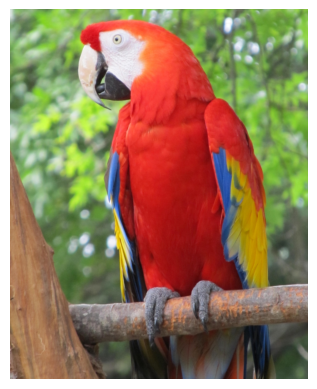

In [1]:
# First load an image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread("parrot.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

In [2]:
def show_result(img_original, img_augmented, boxes_original=None, boxes_augmented=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(img_original)
    ax1.set_title('Original Image')
    ax1.axis('off')
    ax2.imshow(img_augmented) 
    ax2.set_title('Augmented Image')
    ax2.axis('off')

    if boxes_original is not None:
        for box in boxes_original:
            rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='b', facecolor='none')
            ax1.add_patch(rect)
    if boxes_augmented is not None:
        for box in boxes_augmented:
            rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='b', facecolor='none')
            ax2.add_patch(rect)
     
    plt.tight_layout()
    plt.show()

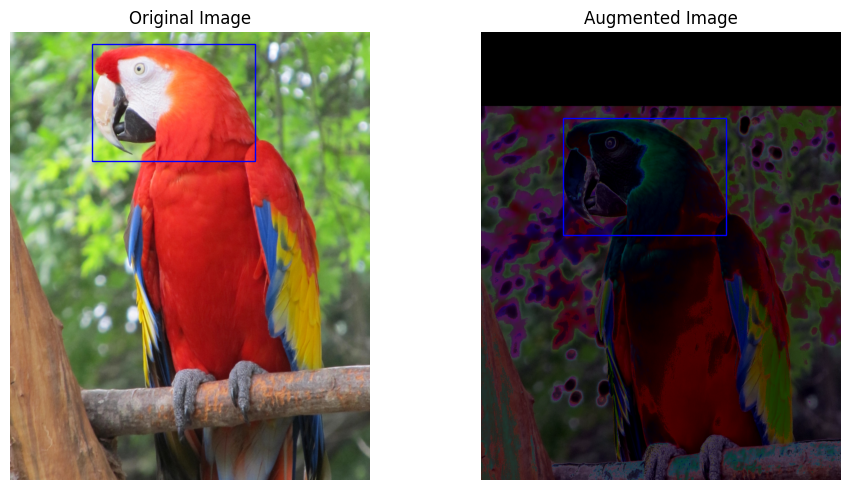

In [11]:
# Augment an image with a bounding box

import albumentations as A

from randaugment import RandAugment

bboxes = [[350, 50, 1050, 550, 0]]

transform = A.Compose([
    RandAugment(num_transforms=5, magnitude=4),
    A.SmallestMaxSize(max_size=800),
], bbox_params=A.BboxParams(format='pascal_voc'))

transformed = transform(image=image, bboxes=bboxes)

show_result(image, transformed["image"], bboxes, transformed["bboxes"])


In [33]:
# Sample transforms manually
randaug = RandAugment()
randaug.sample_transforms()

[NoOp(always_apply=True, p=0.5),
 Affine(always_apply=True, p=0.5, interpolation=1, mask_interpolation=0, cval=0, mode=0, scale={'x': (1.0, 1.0), 'y': (1.0, 1.0)}, translate_percent={'x': (0.0, 0.0), 'y': (-0.15000000000000002, 0.15000000000000002)}, translate_px=None, rotate=(0.0, 0.0), fit_output=False, shear={'x': (0.0, 0.0), 'y': (0.0, 0.0)}, cval_mask=0, keep_ratio=False, rotate_method='largest_box'),
 Rotate(always_apply=True, p=0.5, limit=(-15, 15), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box', crop_border=False)]